### Preprocessing Data (Normalization and Standardization)

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
insurance= pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [2]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#insurance_one_hot= pd.get_dummies(insurance)
X= insurance.drop(['charges'], axis=1)
y=insurance['charges']
X.head()


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [4]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

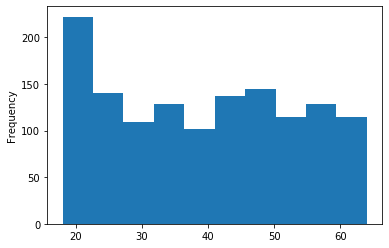

In [5]:
X['age'].plot(kind='hist')

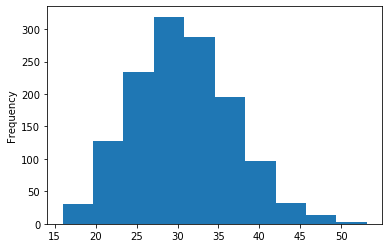

In [6]:
X['bmi'].plot(kind='hist')

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct= make_column_transformer(
(MinMaxScaler(), ['age', 'bmi', 'children']),
(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data

ct.fit(X_train)
# Transform training and test data with normalization(MinMaxScaler)
X_train_normal= ct.transform(X_train)
X_test_normal= ct.transform(X_test)

In [8]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [9]:
X_train_normal[19]

array([0.73913043, 0.69518429, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

In [10]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [11]:
# Build a neural network model to fit in our normalized data
model= tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mae',
             optimizer= tf.keras.optimizers.Adam(), 
             metrics=['mae'])

# Fit the model
model.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [12]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5767 - mae: 3170.5767


[3170.57666015625, 3170.57666015625]

### Neural network Classification

#### Creating data to view and fit

In [13]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples= 1000
# Create circles
X, y= make_circles(n_samples, 
                  noise= 0.03,
                  random_state=42)

In [14]:
# Features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [15]:
# Labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [16]:
# Visualize our data
import pandas as pd
circles= pd. DataFrame({'X0':X[:, 0], "X1": X[:, 1], 'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


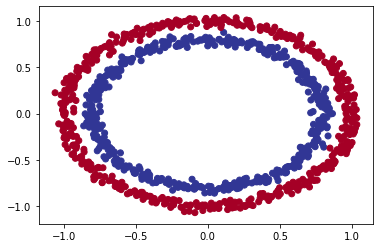

In [17]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap= plt.cm.RdYlBu);


In [18]:
# Check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [19]:
len(X), len(y)

(1000, 1000)

In [20]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [21]:
# Building the model
tf.random.set_seed(42)

model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss='BinaryCrossentropy',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model_1.fit(X, y, epochs=200, verbose=0)

In [22]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 854us/step - loss: 0.6932 - accuracy: 0.4820


[0.6931509375572205, 0.4819999933242798]

In [23]:
# Building another model( with two layers this time)
tf.random.set_seed(42)

model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss='BinaryCrossentropy',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [24]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.5070


[0.7041219472885132, 0.5070000290870667]

In [25]:
# Building third model
tf.random.set_seed(42)

model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3.compile(loss='BinaryCrossentropy',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)


In [26]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

In [27]:
import numpy as np
def plot_decision_boundary(model, X, y):
    x_min, x_max= X[:,0].min()-0.1, X[:, 1].max()+0.1
    y_min, y_max= X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy= np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
    
    x_in= np.c_[xx.ravel(), yy.ravel()]
    
    y_pred= model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0])>1:
        y_pred= np.argmax(y_pred, axis=1).reshape(xx.shape)
    else: 
        print('Doing binary classification')
        y_pred= np.round(y_pred).reshape(xx.shape)
        
    #plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Doing binary classification


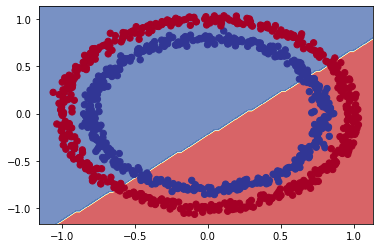

In [28]:
plot_decision_boundary(model=model_3,X=X, y=y)

In [29]:
# Let's see if our model can be used for regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression= tf.range(0, 1000, 5)
y_regression= tf.range(100, 1100, 5)
X_reg_train= X_regression[:150]
X_reg_test= X_regression[150: ]
y_reg_train= y_regression[:150]
y_reg_test= y_regression[150:]

In [30]:
tf.random.set_seed(42)

model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss='mae',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['mae'])

In [31]:
model_4.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

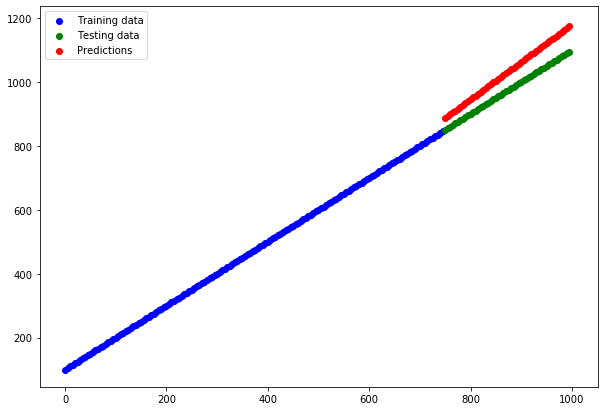

In [32]:
y_reg_pred= model_4.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_pred, c='r', label="Predictions")
plt.legend();


### The missing piece: Non-linearity

In [33]:
# set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'linear')
])

#2. Compile the model
model_4.compile(loss= tf.keras.losses.binary_crossentropy,
               optimizer= 'Adam', 
               metrics=['accuracy'])

#3. Fit the model
history= model_4.fit(X, y, epochs=100, verbose=0)


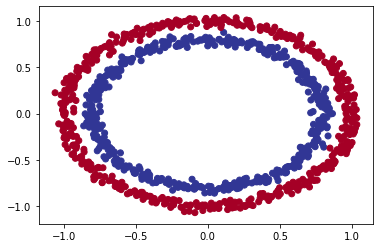

In [34]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


Doing binary classification


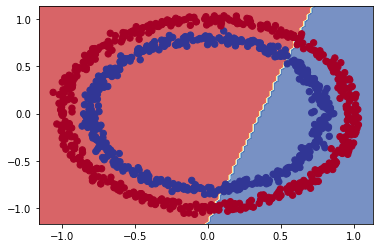

In [35]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

In [36]:
# Building our neural network with a non-linear activation function
# Set random seed
tf.random.set_seed(42)
# Create a model with non-linear activation
model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(lr=0.001),
               metrics=['Accuracy'])
history= model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.2406
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3079 - accuracy: 0.2387
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.2273
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.2300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.2168
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7731 - accuracy: 0.2326
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9250 - accuracy: 0.2119
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6242 - accuracy: 0.2278
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8760 - accuracy: 0.2058
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5485 - accuracy: 0.2390
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.7314 - accuracy: 0.0000e+00
Epoch 81/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7269 - accuracy: 0.0000e+00
Epoch 82/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7232 - accuracy: 0.0000e+00
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7127 - accuracy: 0.0000e+00
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.0000e+00
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.0000e+00
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7248 - accuracy: 0.0000e+00
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7212 - accuracy: 0.0000e+00
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7158 - accuracy: 0.0000e+00
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7

In [37]:
# Multi-layer neural network 
# Set the random seed
tf.random.set_seed(42)

model_6= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss='binary_crossentropy',
               optimizer= tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

history= model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 7.2750 - accuracy: 0.5284
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 7.4647 - accuracy: 0.5161
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 7.5689 - accuracy: 0.5093
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 7.8381 - accuracy: 0.4919
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 8.0268 - accuracy: 0.4796
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 7.8147 - accuracy: 0.4934
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 8.1743 - accuracy: 0.4701
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 7.4337 - accuracy: 0.5181
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 7.4169 - accuracy: 0.5192
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 8.2149 - accuracy: 0.4674
Epoch 93/100


In [38]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 980us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Doing binary classification


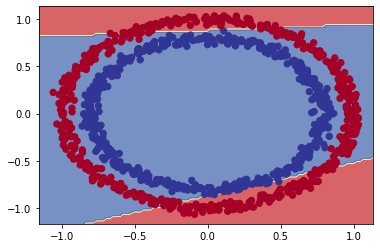

In [39]:
# Visualizing the prediction
plot_decision_boundary(model_6, X, y, )

In [40]:
# Changing the activation function of output layer
# Set the random seed
tf.random.set_seed(42)

model_7= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
               optimizer= tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

history= model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.9636
Epoch 84/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.9741
Epoch 85/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.9669
Epoch 86/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.9745
Epoch 87/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.9760
Epoch 88/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.9732
Epoch 89/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.9812
Epoch 90/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.9782
Epoch 91/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.9808
Epoch 92/250
32/32 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.9817
Epoch 93/250


32/32 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9933
Epoch 165/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9858
Epoch 166/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9952
Epoch 167/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9934
Epoch 168/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.9912
Epoch 169/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9897
Epoch 170/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9942
Epoch 171/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9906
Epoch 172/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9938
Epoch 173/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9924
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9941
Epoch 246/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9916
Epoch 247/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9962
Epoch 248/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9947
Epoch 249/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0425 - accuracy: 0.9965
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9915


In [41]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593365639448166, 0.9919999837875366]

Doing binary classification


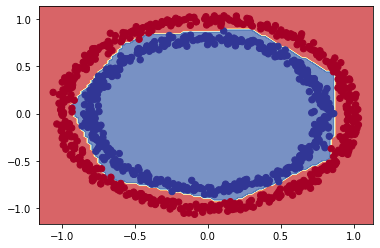

In [42]:
# visualize the prediction
plot_decision_boundary(model_7, X, y)

### Linera and non-linear functions

In [43]:
# Create a toy tensor(similar to the data we pass into our model)
A= tf.cast(tf.range(-10, 10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

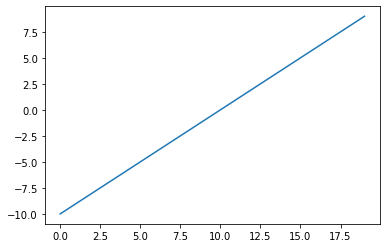

In [44]:
# Visualize our toy tensor
plt.plot(A)

In [45]:
# Replicating sigmoid
def sigmoid(A):
    return 1/(1+tf.exp(-A))

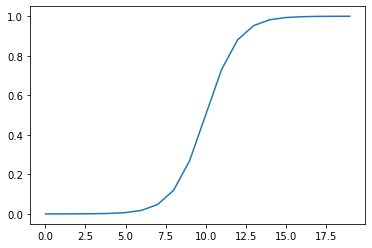

In [46]:
plt.plot(sigmoid(A));

### Evaluating and Improving our classification

In [47]:
len(X)

1000

In [48]:
# Split train and test set
X_train, y_train= X[:800], y[:800]
X_test, y_test= X[800: ], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [49]:
# Fit on training data and evaluate on testing data
tf.random.set_seed(42)
#1. Build the model
model_8= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.01), 
               metrics=['accuracy'])
#fit the model
history= model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5196
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5344
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5371
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5943
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5837
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.5798
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6507
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7259
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7919
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7704
Epoch 11/

25/25 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9861
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9841
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9837
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9960
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9854
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9892
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9836
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9835
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.9882
Epoch 93/100


In [50]:
# Evaluate the model on test data set
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9950


[0.024508746340870857, 0.9950000047683716]

Doing binary classification
Doing binary classification


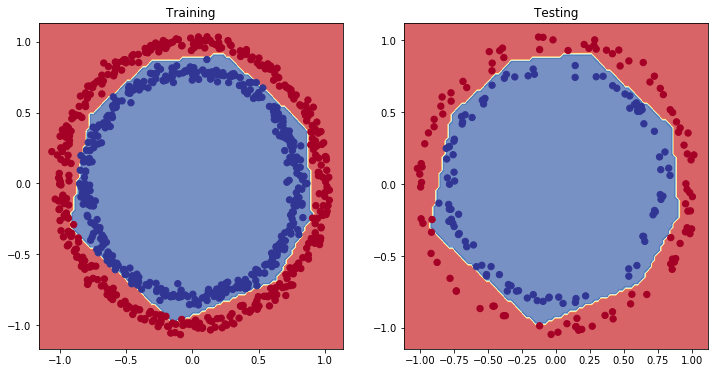

In [51]:
#Plot the decision boundaries for training and test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_8, X=X_test, y= y_test)


### Plot the loss(training) curve

In [52]:
# Convert the history object into DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
...,...,...
95,0.038384,0.98875
96,0.037549,0.99000
97,0.036139,0.99250
98,0.035137,0.99250


Text(0.5, 1.0, 'Model_8 loss curve')

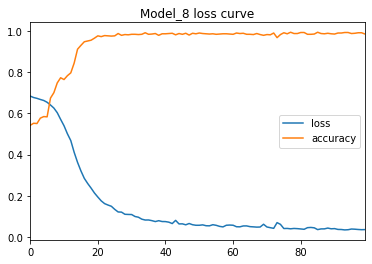

In [53]:
# Plot the curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curve')

### Finding the best learning rate

In [54]:
# Learning rate callback
# set the random seed
tf.random.set_seed(42)
# Create a model
model_9= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 *10**(epoch/20) )

# Fit the model (passing lr_scheduler callback)
history_9= model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5367
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.5069
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7127 - accuracy: 0.5162
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7420 - accuracy: 0.5080
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7941 - accuracy: 0.5224
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7580 - accuracy: 0.4976
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7708 - accuracy: 0.5050
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7315 - accuracy: 0.5469
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8386 - accuracy: 0.5043
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7281 - accuracy: 0.4850


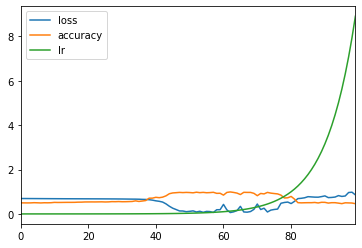

In [55]:
# Check out the history
pd.DataFrame(history_9.history).plot()

Text(0.5, 1.0, 'Learning rate vs. Loss')

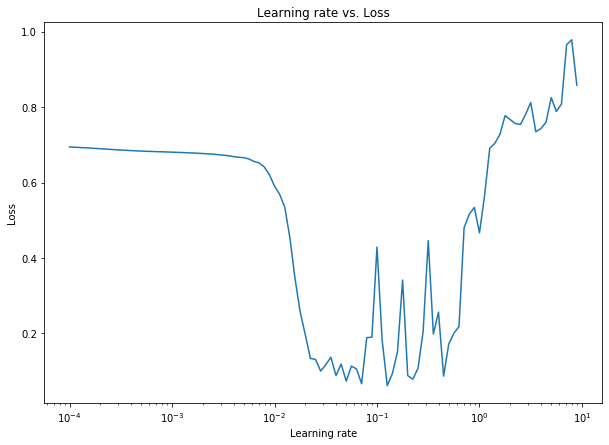

In [56]:
# Plot the learning rate versus the loss
lrs= 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

In [57]:
## Trying a higher learning rate with the same model
tf.random.set_seed(42)
# 1. Create  a model
model_10= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# 2. compile the model with ideal learning rate
model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])

# 3. Fit the model for 20 epochs
history_10= model_10.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/20
25/25 [

In [58]:
# Evaluate model_10 on test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

In [59]:
# Evaluate model_8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9950


[0.024508746340870857, 0.9950000047683716]

Doing binary classification
Doing binary classification


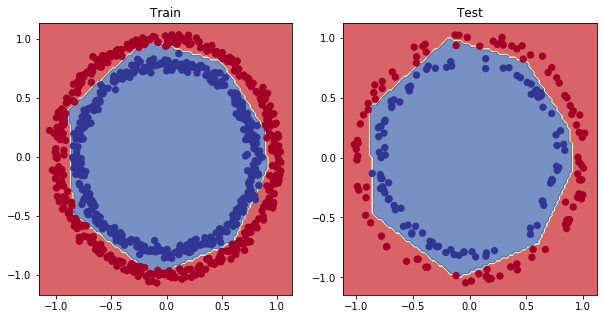

In [60]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

### More classification evaluation methods: Accuracy, Precision, Recall, F1-score, Confusion matrix


In [61]:
## Check the accuracy of our model
loss, accuracy= model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy)*100: .2f}")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740181356668472
Model accuracy on the test set:  99.00


In [62]:
## Create a confusion matrix
from sklearn.metrics import confusion_matrix
# Make predictions
y_preds= model_10.predict(X_test)
confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [63]:
# Convert the prediction probability to binary format 
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [64]:
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

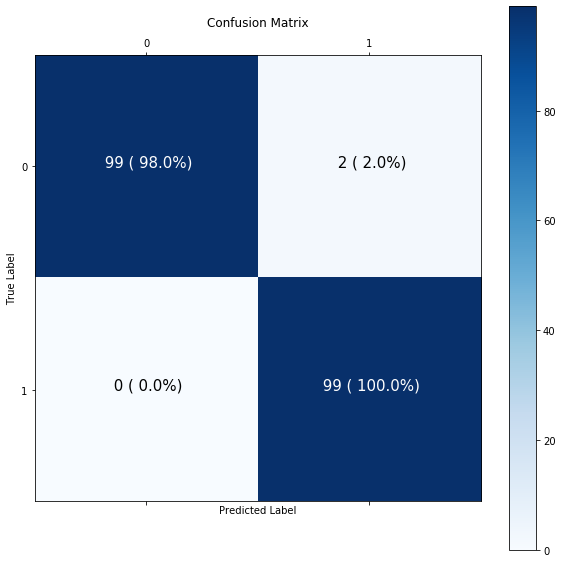

In [65]:
# Making a pretty confusion_matrix
import itertools
figsize=(10, 10)
# Create the confusion matrix
cm= confusion_matrix(y_test, tf.round(y_preds))
cm_norm= cm.astype("float")/cm.sum(axis= 1)[:, np.newaxis] # normalize our confusion_matrix
n_classes= cm.shape[0]

# Let's pretify it
fig, ax= plt.subplots(figsize= figsize)
# Create a matrix plot
cax= ax.matshow(cm, cmap= plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes = False
if classes:
    labels= classes
else:
    labels= np.arange(cm.shape[0])
    
# Label the axes
ax.set(title='Confusion Matrix',
      xlabel='Predicted Label',
      ylabel='True Label',
      xticks= np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels=labels, 
       yticklabels= labels
      )
# Set the threshold for different colors
threshold= (cm.max()+cm.min())/2.
# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f" {cm[i, j]} ({cm_norm[i, j]*100: .1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j]> threshold else 'black',
             size=15)


### Working with a larger example: Multi-class classification

In [66]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()



In [67]:
# Show the first training example
print(f"Training Sample: \n {train_data[0]} \n")
print(f"Training Label: \n {train_labels[0]} \n")

Training Sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [68]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

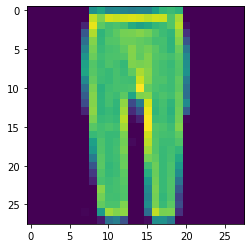

In [69]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[98])

In [70]:
# Check out sample's label
train_labels[98]

1

In [71]:
# Create a small list so we can index onto our training labels so the are human readable
class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', \
              'Ankle Boot']

In [72]:
len(class_names)

10

Text(0.5, 1.0, 'Bag')

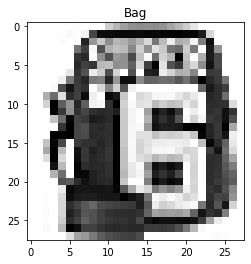

In [73]:
# Plot an example image and its label
index=6000
plt.imshow(train_data[index], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index]])

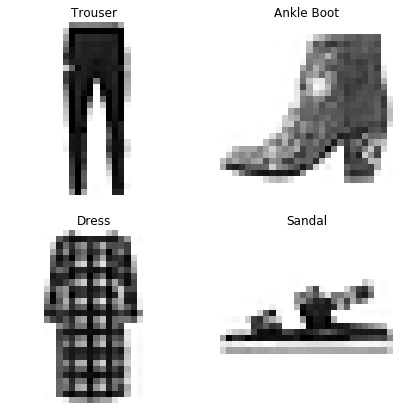

In [74]:
# Plot multiple random images of fashion MNIST
import random 
plt.figure(figsize=(7, 7))
for i in range(4):
    ax= plt.subplot(2, 2, i+1)
    rand_index= random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [75]:
### Building a multi-class classification model
# Input shape: (28*28), the shape of image
# Output shape: 10, one per class of clothing

train_data[0].shape


(28, 28)

In [83]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [78]:
# Buidling the model
# 1. Set random seed
tf.random.set_seed(42)
# 2. Create the model
model_11= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_11.compile(loss='SparseCategoricalCrossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# 3. Fit the model
non_norm_history= model_11.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.8183 - accuracy: 0.1348 - val_loss: 1.7726 - val_accuracy: 0.2123
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7280 - accuracy: 0.2359 - val_loss: 1.6434 - val_accuracy: 0.2845
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6328 - accuracy: 0.2821 - val_loss: 1.6045 - val_accuracy: 0.2853
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5992 - accuracy: 0.2860 - val_loss: 1.6178 - val_accuracy: 0.2838
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6097 - accuracy: 0.2826 - val_loss: 1.5945 - val_accuracy: 0.2868
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5883 - accuracy: 0.2863 - val_loss: 1.5755 - val_accuracy: 0.2831
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5785 - accuracy: 0.3017 - val_loss: 1.5792 - val_accuracy:

In [84]:
model_11.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_38 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Check the min and max of data
train_data.min(), train_data.max()

(0, 255)

### Neural networks prefer data to be scaled or normalized; they like to have the numbers between 0 and 1. 

In [86]:
train_data_norm= train_data/255.0
test_data_norm= test_data/255.0
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [87]:
# Now that our data is normalized
# 1. Set random seed
tf.random.set_seed(42)
# 2. Create the model
model_12= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_12.compile(loss='SparseCategoricalCrossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# 3. Fit the model
norm_history= model_12.fit(train_data_norm,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

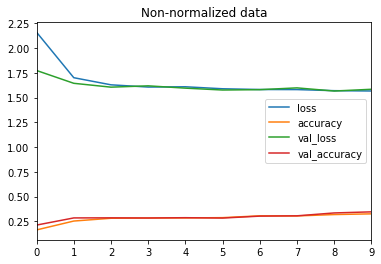

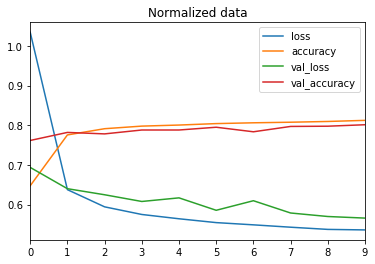

In [88]:
# Plot non-normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# Plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title='Normalized data')

### Finding the ideal learning rate

In [90]:
tf.random.set_seed(42)
# Create model
model_13= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model

model_13.compile(loss='SparseCategoricalCrossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Create the learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

# Fit the model
find_lr_history= model_13.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy

Text(0.5, 1.0, 'Finding the ideal learning rate')

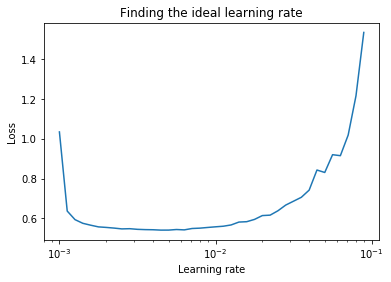

In [91]:
# Plot the learning rate decay curve
lrs= 1e-3 *(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')



In [92]:
## Let's refit the model with ideal learning rate
tf.random.set_seed(42)
model_14= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_14.compile(loss='SparseCategoricalCrossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                metrics=['accuracy'])

model_14.fit(train_data_norm,
            train_labels,
            epochs=20,
            validation_data= (test_data_norm, test_labels))



Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

### Evaluating our multi-class classification model